#**Análisis exploratorio base AMZN**

A continuación se presenta un análisis exploratorio de datos sobre la serie de tiempo financiera de precios de la acción AMZN hasta el 2022.

In [1]:
# Se cargan las librerías que se van a utilizar

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from statsmodels.graphics.tsaplots import plot_acf
from random import random
import statsmodels.api as sm
import seaborn as sns


In [2]:
# Personalización de parámetros para todas las gráficas
plt.rcParams["figure.figsize"] = [16, 5]
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["lines.markerfacecolor"] = "purple"
plt.rcParams["lines.markeredgecolor"] = "purple"
plt.rcParams["lines.markersize"] = 6
plt.rcParams["patch.facecolor"] = "purple"
plt.rcParams["patch.edgecolor"] = "purple"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datos/AMZN.csv", sep=",", header=0)
data['Date'] = pd.to_datetime(data['Date'])
data.head(5)

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/datos/AMZN.csv'

In [ ]:
dimension = data.shape
dimension

(6438, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6438 entries, 0 to 6437
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            6438 non-null   datetime64[ns]
 1   Low             6438 non-null   float64       
 2   Open            6438 non-null   float64       
 3   Volume          6438 non-null   int64         
 4   High            6438 non-null   float64       
 5   Close           6438 non-null   float64       
 6   Adjusted Close  6438 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 352.2 KB


In [ ]:
data.describe()

,Date,Low,Open,Volume,High,Close,Adjusted Close
count,6438,6438.000000,6438.000000,6.438000e+03,6438.000000,6438.000000,6438.000000
mean,2010-02-28 06:56:15.209692416,30.439699,30.844692,1.434210e+08,31.211171,30.830217,30.830217
min,1997-05-15 00:00:00,0.065625,0.070313,9.744000e+06,0.072396,0.069792,0.069792
25%,2003-10-08 06:00:00,1.947031,1.982125,6.943400e+07,2.019000,1.990625,1.990625
50%,2010-03-02 12:00:00,6.167000,6.271750,1.065910e+08,6.368500,6.282750,6.282750
75%,2016-07-21 18:00:00,36.777249,37.237500,1.617355e+08,37.403125,37.104250,37.104250
max,2022-12-12 00:00:00,184.839493,187.199997,2.086584e+09,188.654007,186.570496,186.570496
std,NaN,47.246846,47.870620,1.407553e+08,48.425572,47.831222,47.831222


### **Análisis gráfico**


In [ ]:
# Convertir la columna de fecha al tipo de dato de fecha
datos = data[["Date", "Close"]].set_index(["Date"])

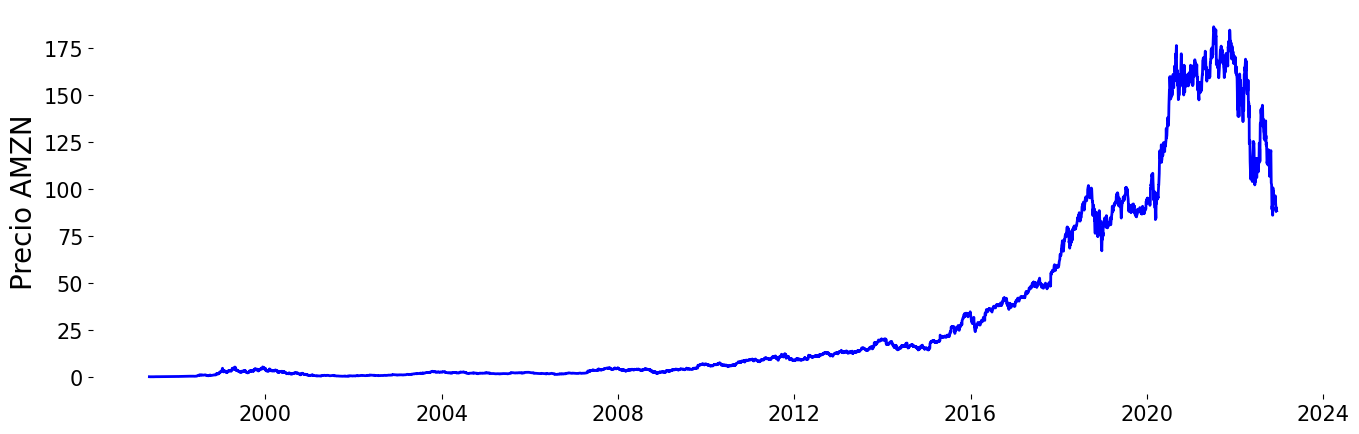

In [ ]:
# Gráfica de la serie de tiempo
fig, ax = plt.subplots()
ax.plot(datos.index, datos["Close"],
        color="blue", linestyle="-")
ax.set_ylabel("Precio AMZN")
plt.show()

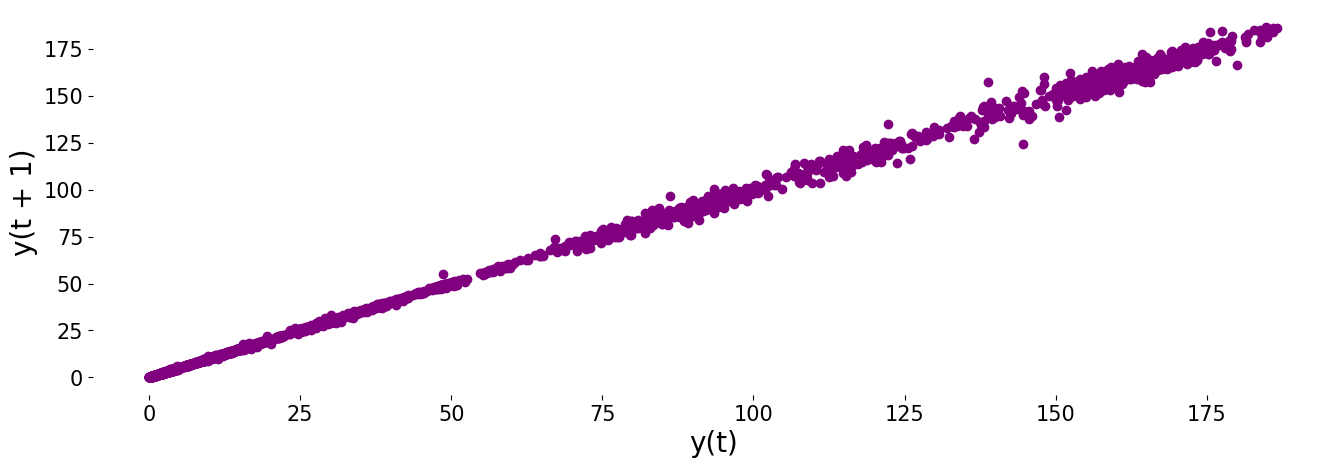

In [ ]:
# Gráficas de retardo
for retraso in range(1, 2):
    pd.plotting.lag_plot(datos["Close"], lag = retraso)
    plt.show()

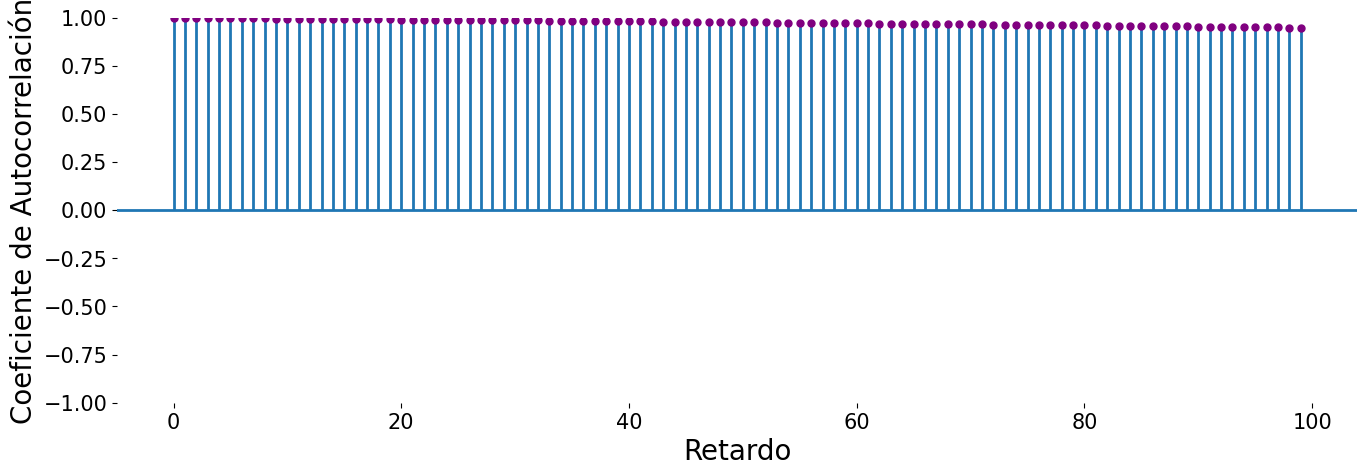

In [ ]:
# Gráfica de la función de autocorrelación
plot_acf(datos, lags=99, alpha=95)
plt.ylabel("Coeficiente de Autocorrelación")
plt.xlabel("Retardo")
plt.title("")
plt.show()

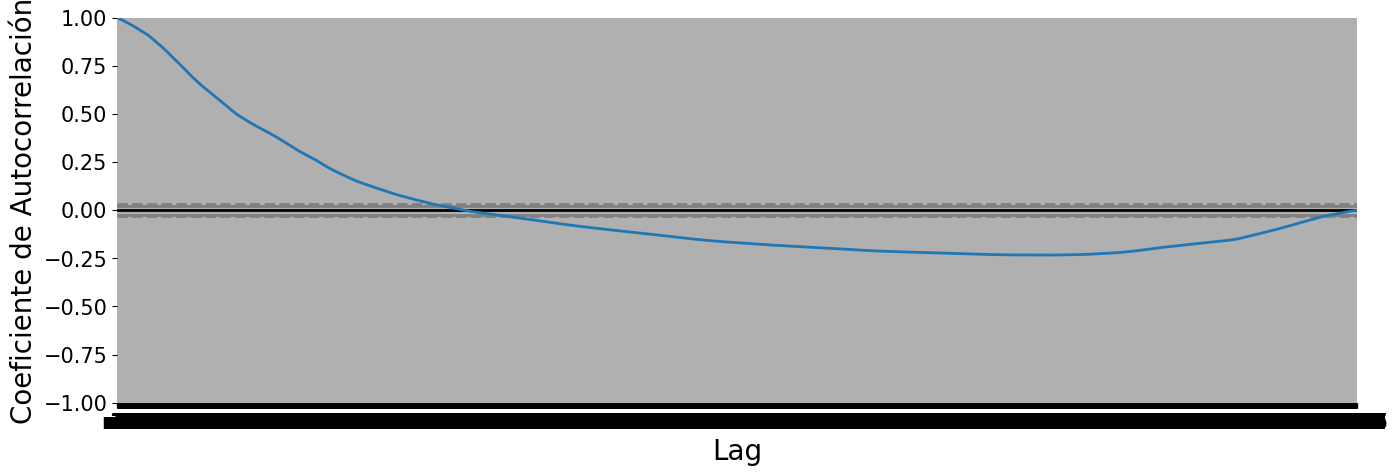

In [ ]:
# Gráfica de la función de autocorrelación versión pandas
pd.plotting.autocorrelation_plot(datos["Close"])
plt.title("")
etiquetas = ["r" + str(i) for i in range(1, datos["Close"].size)]
plt.xticks(ticks=range(1, datos["Close"].size), labels=etiquetas)
plt.ylabel("Coeficiente de Autocorrelación")
plt.show()

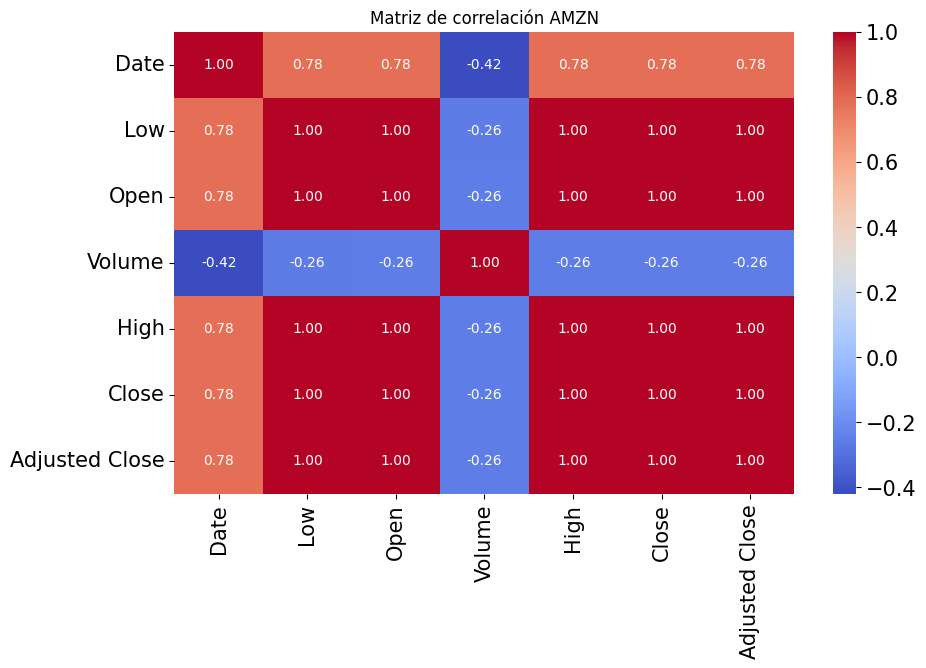

In [ ]:
# Análisis de correlación
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación AMZN')
plt.show()

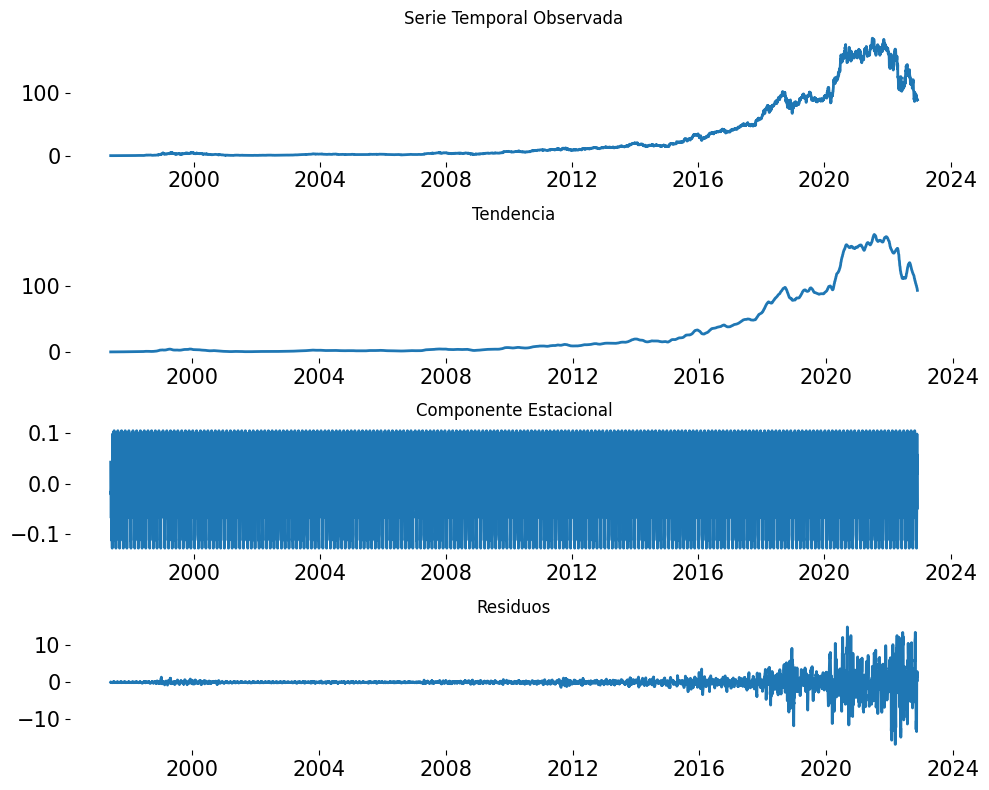

In [ ]:


# Descomposición de la serie temporal
result = sm.tsa.seasonal_decompose(datos['Close'], model='additive', period=30)

# Visualización de los componentes de la descomposición
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(datos.index, result.observed)
plt.title('Serie Temporal Observada')

plt.subplot(4, 1, 2)
plt.plot(datos.index, result.trend)
plt.title('Tendencia')

plt.subplot(4, 1, 3)
plt.plot(datos.index, result.seasonal)
plt.title('Componente Estacional')

plt.subplot(4, 1, 4)
plt.plot(datos.index, result.resid)
plt.title('Residuos')

plt.tight_layout()
plt.show()